# Check Task Data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


import torch
import torch.nn as nn


from NegativeClassOptimization import config, ml
from NegativeClassOptimization import utils
from NegativeClassOptimization import preprocessing

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## MiniAbsolut
- There are some intersections among 95low and looser in multiple, but not all instances.
    - These most likely come from `>=` bug in the script_01 `miniabsolut` section.

In [2]:
for ag in config.ANTIGENS:
    for type in ["train_15000", "test_5000"]:
        print(f"{ag} - {type}")

        df_high = pd.read_csv(f"../data/MiniAbsolut/{ag}/high_{type}.tsv", sep="\t")
        df_looser = pd.read_csv(f"../data/MiniAbsolut/{ag}/looserX_{type}.tsv", sep="\t")
        df_95 = pd.read_csv(f"../data/MiniAbsolut/{ag}/95low_{type}.tsv", sep="\t")

        slides_high = set(df_high["Slide"])
        slides_looser = set(df_looser["Slide"])
        slides_95 = set(df_95["Slide"])

        # Compute intersections among the three and print the results
        slides_high_looser = slides_high.intersection(slides_looser)
        slides_high_95 = slides_high.intersection(slides_95)
        slides_looser_95 = slides_looser.intersection(slides_95)
        slides_all = slides_high.intersection(slides_looser).intersection(slides_95)
        print(f"High vs Looser: {len(slides_high_looser)}")
        print(f"High vs 95: {len(slides_high_95)}")
        print(f"Looser vs 95: {len(slides_looser_95)}")
        print(f"All: {len(slides_all)}")
        print('------\n')

3VRL - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 5
All: 0
------

3VRL - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 1
All: 0
------

1NSN - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 3
All: 0
------

1NSN - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 0
All: 0
------

3RAJ - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 4
All: 0
------

3RAJ - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 0
All: 0
------

5E94 - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 2
All: 0
------

5E94 - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 0
All: 0
------

1H0D - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 4
All: 0
------

1H0D - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 0
All: 0
------

1WEJ - train_15000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 5
All: 0
------

1WEJ - test_5000
High vs Looser: 0
High vs 95: 0
Looser vs 95: 0
All: 0
------

1ADQ - train_15000
High vs L

From a more detailed analyses, we observe
- intersections between 95low and loosers of different antigens, but that is to be expected.
- intersections between loosers and high of different antigens, again, to be expected.

3VRL - train_15000
3VRL - test_5000
1NSN - train_15000
1NSN - test_5000
3RAJ - train_15000
3RAJ - test_5000
5E94 - train_15000
5E94 - test_5000
1H0D - train_15000
1H0D - test_5000
1WEJ - train_15000
1WEJ - test_5000
1ADQ - train_15000
1ADQ - test_5000
1FBI - train_15000
1FBI - test_5000
2YPV - train_15000
2YPV - test_5000
1OB1 - train_15000
1OB1 - test_5000


<AxesSubplot: >

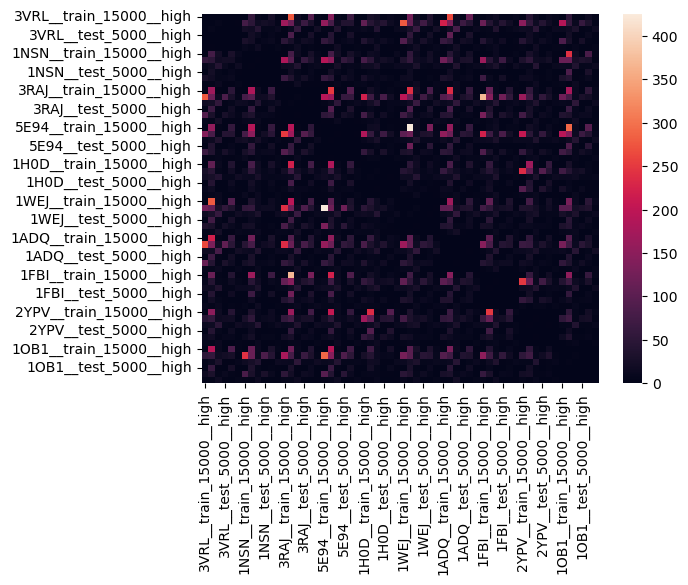

In [3]:
slides = {}
for ag in config.ANTIGENS:
    for type in ["train_15000", "test_5000"]:
        print(f"{ag} - {type}")

        df_high = pd.read_csv(f"../data/MiniAbsolut/{ag}/high_{type}.tsv", sep="\t")
        df_looser = pd.read_csv(f"../data/MiniAbsolut/{ag}/looserX_{type}.tsv", sep="\t")
        df_95 = pd.read_csv(f"../data/MiniAbsolut/{ag}/95low_{type}.tsv", sep="\t")

        slides_high = set(df_high["Slide"])
        slides_looser = set(df_looser["Slide"])
        slides_95 = set(df_95["Slide"])

        slides[f"{ag}__{type}__high"] = slides_high
        slides[f"{ag}__{type}__looser"] = slides_looser
        slides[f"{ag}__{type}__95"] = slides_95

# Compute intersections among all slides in slides dictionary
keys = list(slides.keys())
intersections = np.zeros((len(keys), len(keys)))
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if key1 != key2:
            slides_inter = slides[key1].intersection(slides[key2])
            intersections[i, j] = len(slides_inter)

df = pd.DataFrame(intersections, index=keys, columns=keys)
sns.heatmap(df)

In [4]:
df = df.reset_index().melt(id_vars="index").sort_values("value", ascending=False)
df.head(30)

,index,variable,value
1111,1WEJ__train_15000__looser,5E94__train_15000__high,426.0
1878,5E94__train_15000__high,1WEJ__train_15000__looser,426.0
2533,3RAJ__train_15000__looser,1FBI__train_15000__high,371.0
822,1FBI__train_15000__high,3RAJ__train_15000__looser,371.0
1135,1OB1__train_15000__looser,5E94__train_15000__high,291.0
3318,5E94__train_15000__high,1OB1__train_15000__looser,291.0
1801,3VRL__train_15000__looser,1WEJ__train_15000__high,279.0
90,1WEJ__train_15000__high,3VRL__train_15000__looser,279.0
780,3VRL__train_15000__high,3RAJ__train_15000__looser,277.0
13,3RAJ__train_15000__looser,3VRL__train_15000__high,277.0


In [5]:
df["index_type"] = df["index"].apply(lambda x: x.split("__")[-1])
df["index_ag"] = df["index"].apply(lambda x: x.split("__")[0])

df["variable_type"] = df["variable"].apply(lambda x: x.split("__")[-1])
df["variable_ag"] = df["variable"].apply(lambda x: x.split("__")[0])

df

,index,variable,value,index_type,index_ag,variable_type,variable_ag
1111,1WEJ__train_15000__looser,5E94__train_15000__high,426.0,looser,1WEJ,high,5E94
1878,5E94__train_15000__high,1WEJ__train_15000__looser,426.0,high,5E94,looser,1WEJ
2533,3RAJ__train_15000__looser,1FBI__train_15000__high,371.0,looser,3RAJ,high,1FBI
822,1FBI__train_15000__high,3RAJ__train_15000__looser,371.0,high,1FBI,looser,3RAJ
1135,1OB1__train_15000__looser,5E94__train_15000__high,291.0,looser,1OB1,high,5E94
...,...,...,...,...,...,...,...
2013,1WEJ__test_5000__high,1WEJ__test_5000__high,0.0,high,1WEJ,high,1WEJ
2012,1WEJ__train_15000__95,1WEJ__test_5000__high,0.0,95,1WEJ,high,1WEJ
2011,1WEJ__train_15000__looser,1WEJ__test_5000__high,0.0,looser,1WEJ,high,1WEJ
2010,1WEJ__train_15000__high,1WEJ__test_5000__high,0.0,high,1WEJ,high,1WEJ


In [6]:
# Exclude non-relevant cases
df = df.query("~((index_ag != variable_ag) & ((index_type == 'high' & variable_type in ['looser', '95']) | (index_type in ['looser', '95'] & variable_type == 'high')))")

df = df.query("~((index_type == variable_type) & (index_type in ['looser', '95']))")

# df.to_csv("02c_check.tsv", sep='\t')

## Frozen_MiniAbsolut_ML

In [2]:
base_p = Path("../data/Frozen_MiniAbsolut_ML")
task_types = ["1_vs_1", "1_vs_9", "high_vs_95low", "high_vs_looser"]

slides = {}
for task_type in task_types:
    task_type_p = base_p / task_type
    
    for task_p in list(task_type_p.glob("*")):
        
        task = task_p.name
        ag_pos = task.split("__vs__")[0]
        ag_neg = task.split("__vs__")[1]

        # Get the hash value and the datasets
        hash_val = list(task_p.glob("*tsv"))[0].name.split("_")[0]
        train_dataset = pd.read_csv(task_p / f"{hash_val}_train_dataset.tsv", sep="\t")
        test_dataset = pd.read_csv(task_p / f"{hash_val}_test_dataset.tsv", sep="\t")

        train_pos_slides = set(train_dataset.query("binds_a_pos_ag == 1")["Slide"])
        train_neg_slides = set(train_dataset.query("binds_a_pos_ag == 0")["Slide"])
        test_pos_slides = set(test_dataset.query("binds_a_pos_ag == 1")["Slide"])
        test_neg_slides = set(test_dataset.query("binds_a_pos_ag == 0")["Slide"])

        if "_" not in ag_pos:
            ag_pos = ag_pos + "_high"
        if "_" not in ag_neg and ag_neg != "9":
            ag_neg = ag_neg + "_high" 

        slides[task] = {
            "ag_pos": ag_pos,
            "ag_neg": ag_neg,
            "train_pos_slides": train_pos_slides,
            "train_neg_slides": train_neg_slides,
            "test_pos_slides": test_pos_slides,
            "test_neg_slides": test_neg_slides,
        }

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


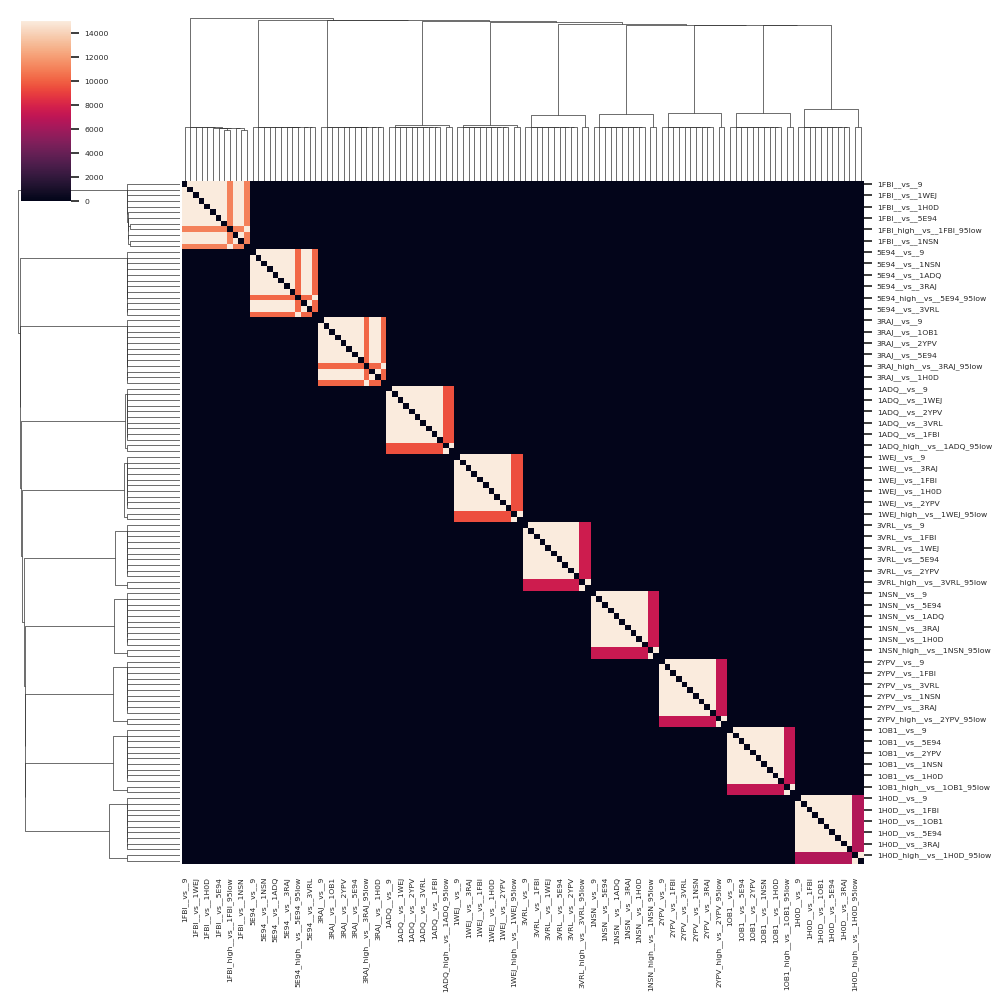

In [3]:
# Positive train intersections
keys = list(slides.keys())
intersections = np.zeros((len(keys), len(keys)))
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if key1 != key2:
            slides_inter = slides[key1]["train_pos_slides"].intersection(slides[key2]["train_pos_slides"])
            intersections[i, j] = len(slides_inter)
df = pd.DataFrame(intersections, index=keys, columns=keys)

# Clustermap with small font size
sns.set(font_scale=0.5)
sns.clustermap(df)

Explanation for intersections in the positive training sets:
- Our matrix is 110 x 110 => 12100 values, but 5995 effective comparisons ((110×110−110)÷2)
- 90.9% are no intersections - good
- ~7.4% (900 => 450) are complete intersections (15000 slides) - this is not expected: 10 antigens * 45

In [4]:
np.unique(df.values.flatten(), return_counts=True)

(array([    0.,  6612.,  7199.,  7226.,  7424.,  7617.,  9483.,  9522.,
        10142., 10236., 11018., 15000.]),
 array([13080,    40,    40,    40,    40,    40,    40,    40,    40,
           40,    40,   920]))

In [5]:
# Totally makes sense 
for i, j in zip(*np.where(df.values == 15000)):
    print(df.index[i], df.columns[j])

1WEJ__vs__2YPV 1WEJ__vs__3VRL
1WEJ__vs__2YPV 1WEJ__vs__1OB1
1WEJ__vs__2YPV 1WEJ__vs__1H0D
1WEJ__vs__2YPV 1WEJ__vs__5E94
1WEJ__vs__2YPV 1WEJ__vs__1FBI
1WEJ__vs__2YPV 1WEJ__vs__1NSN
1WEJ__vs__2YPV 1WEJ__vs__3RAJ
1WEJ__vs__2YPV 1WEJ__vs__1ADQ
1WEJ__vs__2YPV 1WEJ__vs__9
2YPV__vs__3RAJ 2YPV__vs__1H0D
2YPV__vs__3RAJ 2YPV__vs__1OB1
2YPV__vs__3RAJ 2YPV__vs__1NSN
2YPV__vs__3RAJ 2YPV__vs__1WEJ
2YPV__vs__3RAJ 2YPV__vs__3VRL
2YPV__vs__3RAJ 2YPV__vs__1ADQ
2YPV__vs__3RAJ 2YPV__vs__1FBI
2YPV__vs__3RAJ 2YPV__vs__5E94
2YPV__vs__3RAJ 2YPV__vs__9
1H0D__vs__3RAJ 1H0D__vs__1NSN
1H0D__vs__3RAJ 1H0D__vs__1WEJ
1H0D__vs__3RAJ 1H0D__vs__5E94
1H0D__vs__3RAJ 1H0D__vs__3VRL
1H0D__vs__3RAJ 1H0D__vs__1OB1
1H0D__vs__3RAJ 1H0D__vs__1ADQ
1H0D__vs__3RAJ 1H0D__vs__1FBI
1H0D__vs__3RAJ 1H0D__vs__2YPV
1H0D__vs__3RAJ 1H0D__vs__9
2YPV__vs__1H0D 2YPV__vs__3RAJ
2YPV__vs__1H0D 2YPV__vs__1OB1
2YPV__vs__1H0D 2YPV__vs__1NSN
2YPV__vs__1H0D 2YPV__vs__1WEJ
2YPV__vs__1H0D 2YPV__vs__3VRL
2YPV__vs__1H0D 2YPV__vs__1ADQ
2YPV__vs__1H0D 2YPV

In [6]:
# Issue here. Positive from 1v1 different from positive in (high_vs_95low, high_vs_looser)
for i, j in zip(*np.where((0 < df.values) & (df.values < 15000))):
    print(df.index[i], df.columns[j])

1WEJ__vs__2YPV 1WEJ_high__vs__1WEJ_95low
1WEJ__vs__2YPV 1WEJ_high__vs__1WEJ_looser
2YPV__vs__3RAJ 2YPV_high__vs__2YPV_95low
2YPV__vs__3RAJ 2YPV_high__vs__2YPV_looser
1H0D__vs__3RAJ 1H0D_high__vs__1H0D_95low
1H0D__vs__3RAJ 1H0D_high__vs__1H0D_looser
2YPV__vs__1H0D 2YPV_high__vs__2YPV_95low
2YPV__vs__1H0D 2YPV_high__vs__2YPV_looser
1FBI__vs__3RAJ 1FBI_high__vs__1FBI_95low
1FBI__vs__3RAJ 1FBI_high__vs__1FBI_looser
5E94__vs__2YPV 5E94_high__vs__5E94_95low
5E94__vs__2YPV 5E94_high__vs__5E94_looser
1FBI__vs__1NSN 1FBI_high__vs__1FBI_95low
1FBI__vs__1NSN 1FBI_high__vs__1FBI_looser
3VRL__vs__2YPV 3VRL_high__vs__3VRL_95low
3VRL__vs__2YPV 3VRL_high__vs__3VRL_looser
2YPV__vs__1OB1 2YPV_high__vs__2YPV_95low
2YPV__vs__1OB1 2YPV_high__vs__2YPV_looser
1FBI__vs__5E94 1FBI_high__vs__1FBI_95low
1FBI__vs__5E94 1FBI_high__vs__1FBI_looser
1WEJ__vs__3VRL 1WEJ_high__vs__1WEJ_95low
1WEJ__vs__3VRL 1WEJ_high__vs__1WEJ_looser
1NSN__vs__1H0D 1NSN_high__vs__1NSN_95low
1NSN__vs__1H0D 1NSN_high__vs__1NSN_looser
1WEJ

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


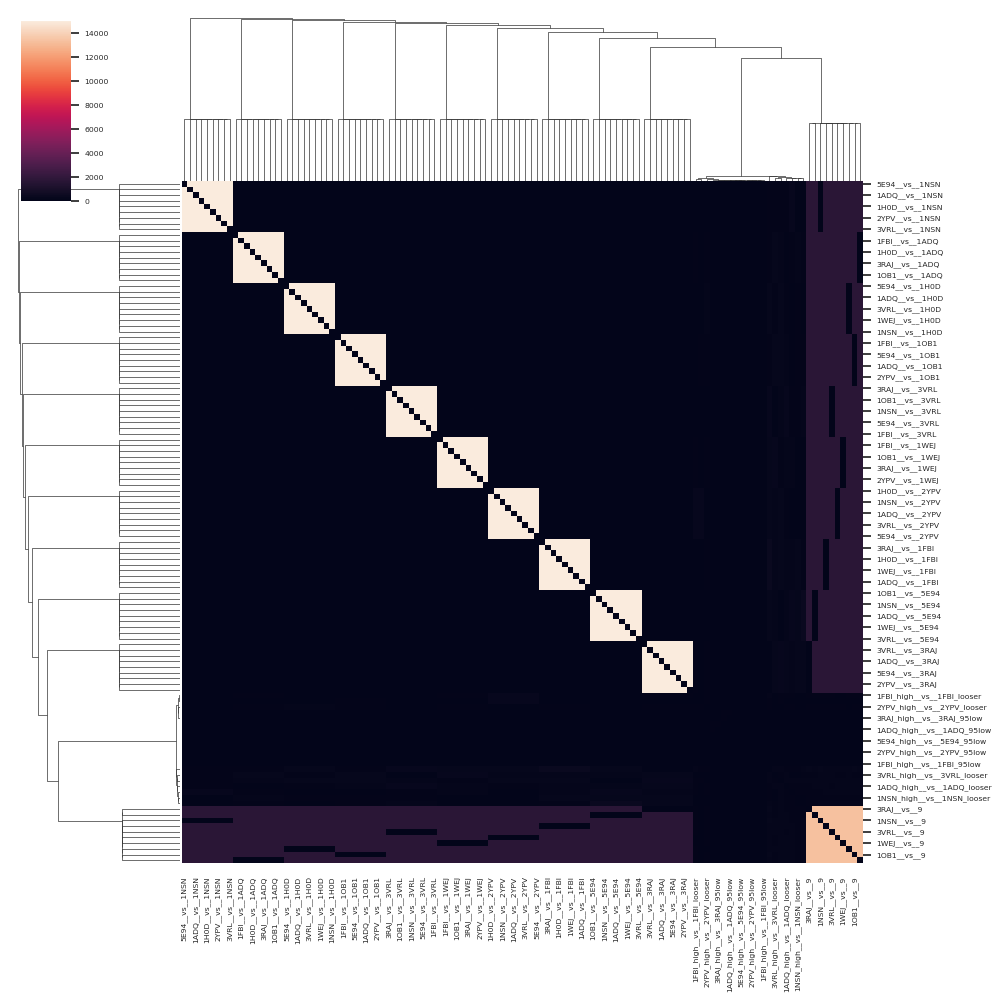

In [7]:
# Negative train intersections
keys = list(slides.keys())
intersections = np.zeros((len(keys), len(keys)))
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if key1 != key2:
            slides_inter = slides[key1]["train_neg_slides"].intersection(slides[key2]["train_neg_slides"])
            intersections[i, j] = len(slides_inter)
df = pd.DataFrame(intersections, index=keys, columns=keys)
sns.clustermap(df)

Negative intersections explanations:
- <=405 - negative is less controlled and we have the `>=` bug. But this is minor.
- 1666 - intersections between 1v9 and all the 1v1
- 13328 - intersections among 1v9
- 15000 - intersections among 1v1 mainly, and some between 

In [13]:
np.unique(df.values.flatten(), return_counts=True)

(array([0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00,
        1.0000e+01, 1.1000e+01, 1.2000e+01, 1.3000e+01, 1.4000e+01,
        1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01, 1.9000e+01,
        2.0000e+01, 2.1000e+01, 2.3000e+01, 2.4000e+01, 2.5000e+01,
        2.6000e+01, 2.7000e+01, 2.8000e+01, 2.9000e+01, 3.0000e+01,
        3.1000e+01, 3.2000e+01, 3.3000e+01, 3.4000e+01, 3.5000e+01,
        3.6000e+01, 3.7000e+01, 3.8000e+01, 3.9000e+01, 4.0000e+01,
        4.1000e+01, 4.2000e+01, 4.3000e+01, 4.4000e+01, 4.5000e+01,
        4.7000e+01, 4.8000e+01, 4.9000e+01, 5.1000e+01, 5.2000e+01,
        5.3000e+01, 5.4000e+01, 5.5000e+01, 5.7000e+01, 5.8000e+01,
        5.9000e+01, 6.0000e+01, 6.1000e+01, 6.2000e+01, 6.3000e+01,
        6.4000e+01, 6.5000e+01, 6.6000e+01, 6.7000e+01, 6.8000e+01,
        6.9000e+01, 7.0000e+01, 7.1000e+01, 7.2000e+01, 7.3000e+01,
        7.5000e+01, 7.8000e+01, 7.9000e+01, 8.00

<AxesSubplot: ylabel='Count'>

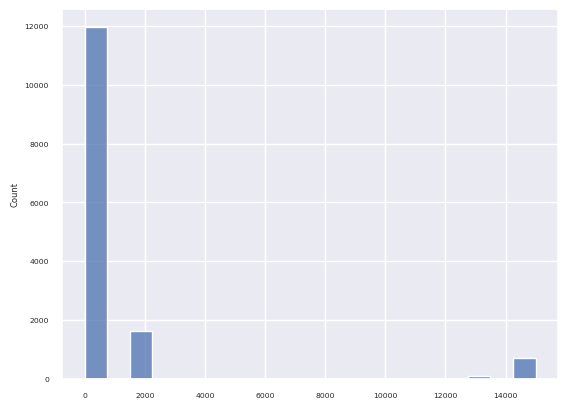

In [14]:
sns.histplot(df.values.flatten(), bins=20)

In [15]:
# Check the binders
# => Clearly the same looser and 95low -> bug.
tasks = []
for task_type in ["high_vs_95low", "high_vs_looser"]:
    task_type_p = base_p / task_type
    for task_p in list(task_type_p.glob("*")):
        task = task_p.name
        tasks.append(task)

df.loc[tasks, tasks]

,1OB1_high__vs__1OB1_95low,1NSN_high__vs__1NSN_95low,1ADQ_high__vs__1ADQ_95low,1WEJ_high__vs__1WEJ_95low,3VRL_high__vs__3VRL_95low,3RAJ_high__vs__3RAJ_95low,5E94_high__vs__5E94_95low,1H0D_high__vs__1H0D_95low,2YPV_high__vs__2YPV_95low,1FBI_high__vs__1FBI_95low,3RAJ_high__vs__3RAJ_looser,2YPV_high__vs__2YPV_looser,1OB1_high__vs__1OB1_looser,1FBI_high__vs__1FBI_looser,1NSN_high__vs__1NSN_looser,1WEJ_high__vs__1WEJ_looser,3VRL_high__vs__3VRL_looser,1ADQ_high__vs__1ADQ_looser,5E94_high__vs__5E94_looser,1H0D_high__vs__1H0D_looser
1OB1_high__vs__1OB1_95low,0.0,37.0,44.0,33.0,30.0,51.0,40.0,15.0,38.0,35.0,10.0,6.0,4.0,16.0,24.0,23.0,10.0,12.0,14.0,17.0
1NSN_high__vs__1NSN_95low,37.0,0.0,36.0,31.0,41.0,38.0,24.0,28.0,40.0,30.0,16.0,5.0,11.0,17.0,3.0,12.0,15.0,7.0,5.0,16.0
1ADQ_high__vs__1ADQ_95low,44.0,36.0,0.0,54.0,79.0,54.0,41.0,35.0,29.0,38.0,9.0,16.0,8.0,11.0,12.0,21.0,18.0,1.0,9.0,16.0
1WEJ_high__vs__1WEJ_95low,33.0,31.0,54.0,0.0,60.0,64.0,34.0,40.0,26.0,28.0,13.0,19.0,15.0,13.0,15.0,5.0,27.0,15.0,14.0,14.0
3VRL_high__vs__3VRL_95low,30.0,41.0,79.0,60.0,0.0,55.0,36.0,39.0,48.0,36.0,13.0,14.0,16.0,5.0,18.0,25.0,5.0,17.0,4.0,6.0
3RAJ_high__vs__3RAJ_95low,51.0,38.0,54.0,64.0,55.0,0.0,52.0,42.0,36.0,41.0,4.0,15.0,8.0,16.0,8.0,18.0,20.0,16.0,11.0,20.0
5E94_high__vs__5E94_95low,40.0,24.0,41.0,34.0,36.0,52.0,0.0,28.0,34.0,29.0,4.0,10.0,14.0,14.0,11.0,13.0,14.0,9.0,2.0,14.0
1H0D_high__vs__1H0D_95low,15.0,28.0,35.0,40.0,39.0,42.0,28.0,0.0,30.0,33.0,12.0,11.0,12.0,12.0,11.0,16.0,25.0,14.0,12.0,4.0
2YPV_high__vs__2YPV_95low,38.0,40.0,29.0,26.0,48.0,36.0,34.0,30.0,0.0,35.0,11.0,3.0,8.0,11.0,16.0,21.0,15.0,13.0,11.0,14.0
1FBI_high__vs__1FBI_95low,35.0,30.0,38.0,28.0,36.0,41.0,29.0,33.0,35.0,0.0,16.0,18.0,13.0,2.0,14.0,17.0,14.0,7.0,15.0,21.0
